### Case a ser respondindo sobre análise de métricas de pagamentos

Solicitaram para você que seja criado um modelo de apuração de métricas de
processamento em relação ao valor, quantidade de vendas e método de pagamento.
Para tal, uma base de dados (metricas_dados_de_pagamento) foi disponibilizada
como referencial, contendo as colunas user_id (Representa o parceiro analisado),
mes_ano, metodo_pagamento, status_finalizacao, qtd_total (Quantidade de
transações) e tpv (Valor total processado). Para o fechamento de receita, são
considerados apenas os pedidos finalizados em integrado, sendo assim, os
questionamentos são os seguintes:

- a) Qual parceiro (user_id) possui o maior processamento em termos de TPV em
cada um dos meses?
- b) Em qual dos meses ocorre o pico de processamento de cartão de crédito?
- c) Parceiros supremos são aqueles que possuem média de processamento
total superior a 300 mil reais olhando para um período de 3 meses de
processamento, com isso em mente, quantos e quais são os parceiros
supremos contidos na base?
- d) Analisar a estabilidade do processamento dos parceiros é um dos pontos
vitais para a manutenção da saúde processual de uma fintech, com isso em
mente, em termos percentuais e inteiros, qual foi a oscilação do total de
parceiros com processamento maior do que zero de agosto para setembro

# 1. BIBLIOTECAS


In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. IMPORTANDO ARQUIVOS CSV

In [131]:
df_metricas_pagamento = pd.read_csv(r'C:\Users\user\Desktop\Estudos_Data_Science\Case_tecnico_CDJ\metricas_dados_de_pagamento.csv')

In [132]:
df_metricas_pagamento.columns

Index(['mes_ano', 'metodo_pagamento', 'status_finalizacao', 'qtd_total', 'tpv',
       'user_id'],
      dtype='object')

# 3. Análises e respostas


- a) Qual parceiro (user_id) possui o maior processamento em termos de TPV em
cada um dos meses?

In [133]:
df_metricas_pagamento.head()

,mes_ano,metodo_pagamento,status_finalizacao,qtd_total,tpv,user_id
0,2024-08,CreditCard,integrado,25,5400.20,1
1,2024-07,CreditCard,cancelado,133,14704.70,1
2,2024-08,CreditCard,cancelado,130,14830.37,1
3,2024-07,CreditCard,recusado_por_risco,2,259.80,1
4,2024-09,CreditCard,recusado_por_risco,4,309.60,1


In [134]:
# Filtrar apenas as transações com status 'integrado'
df_integrado = df_metricas_pagamento[df_metricas_pagamento['status_finalizacao'] == 'integrado']

# Agrupar por mes_ano e user_id, somando o TPV 
df_agrupado = df_integrado.groupby(['mes_ano', 'user_id'])['tpv'].sum().reset_index()

df_maior_tpv_por_mes = df_agrupado.loc[df_agrupado.groupby('mes_ano')['tpv'].idxmax()]

print(df_maior_tpv_por_mes)


       mes_ano  user_id          tpv
3511   2024-07     4057  51822500.00
8982   2024-08      652  12256841.77
16863  2024-09      652   8982559.97


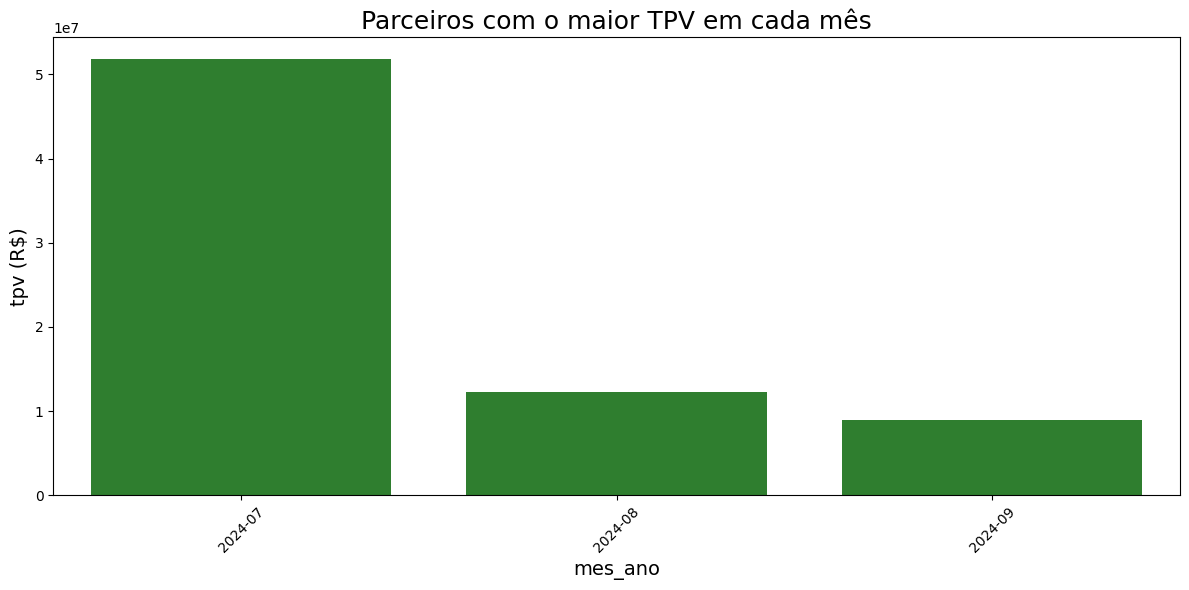

In [135]:
#grafico que nos mostra o parceiro com o maior TPV por mes
plt.figure(figsize=(12, 6))
sns.barplot(x='mes_ano', y='tpv', data=df_maior_tpv_por_mes, color='forestgreen')
plt.title('Parceiros com o maior TPV em cada mês', fontsize=18)
plt.xlabel('mes_ano', fontsize=14)
plt.ylabel('tpv (R$)', fontsize=14)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- b) Em qual dos meses ocorre o pico de processamento de cartão de crédito?

In [136]:
# Filtrar apenas as transações com método de pagamento 'cartão de crédito' e status 'integrado'
df_cartao_credito = df_integrado[(df_integrado['metodo_pagamento'] == 'CreditCard') & 
                       (df_integrado['status_finalizacao'] == 'integrado')]

# Agrupar por mes_ano, somando o TPV
df_tpv_por_mes = df_cartao_credito.groupby('mes_ano')['tpv'].sum().reset_index()
mes_pico = df_tpv_por_mes.loc[df_tpv_por_mes['tpv'].idxmax()]

print(mes_pico)


mes_ano         2024-07
tpv        192642173.86
Name: 0, dtype: object


- c) Parceiros supremos são aqueles que possuem média de processamento
total superior a 300 mil reais olhando para um período de 3 meses de
processamento, com isso em mente, quantos e quais são os parceiros
supremos contidos na base?

In [137]:
df_agrupar = df_metricas_pagamento[df_metricas_pagamento['status_finalizacao'] == 'integrado'] \
    .groupby(['user_id', 'mes_ano'])['tpv'].sum().reset_index()

df_agrupar = df_agrupar.sort_values(by=['user_id', 'mes_ano'])

# Aplicar a média móvel de 3 meses para cada parceiro
df_agrupar['media_3_meses'] = df_agrupar.groupby('user_id')['tpv'].rolling(window=3).mean().reset_index(drop=True)

# Filtrar os parceiros cuja média de 3 meses é superior a 300 mil reais
df_parceiros_supremos = df_agrupar[df_agrupar['media_3_meses'] > 300000]['user_id'].unique()

quantidade_parceiros_supremos = len(df_parceiros_supremos)
lista_parceiros_supremos = df_parceiros_supremos.tolist()

print(f"Quantidade de parceiros supremos: {quantidade_parceiros_supremos}")
print(f"Parceiros supremos: {lista_parceiros_supremos}")




Quantidade de parceiros supremos: 118
Parceiros supremos: [50, 51, 58, 63, 67, 105, 112, 113, 129, 130, 141, 185, 224, 264, 296, 328, 366, 453, 481, 515, 526, 532, 539, 557, 594, 629, 652, 653, 679, 710, 719, 746, 770, 777, 787, 799, 862, 879, 880, 882, 895, 905, 940, 973, 1043, 1121, 1190, 1226, 1363, 1466, 1525, 1603, 1758, 1768, 1772, 1778, 1784, 1826, 1843, 2001, 2058, 2066, 2173, 2174, 2297, 2460, 2601, 2616, 2657, 2663, 2837, 2867, 2880, 2905, 2917, 3105, 3113, 3140, 3191, 3221, 3283, 3288, 3361, 3467, 3655, 3812, 3822, 3879, 3893, 3958, 4008, 4057, 4174, 4189, 4244, 4258, 4279, 4378, 4393, 4563, 4646, 4670, 4791, 4883, 5178, 5341, 7174, 9132, 9139, 9161, 9163, 9175, 9184, 9200, 9207, 9223, 9242, 11754]


- d) Analisar a estabilidade do processamento dos parceiros é um dos pontos
vitais para a manutenção da saúde processual de uma fintech, com isso em
mente, em termos percentuais e inteiros, qual foi a oscilação do total de
parceiros com processamento maior do que zero de agosto para setembro

In [138]:
# Filtrar apenas as transações com status 'integrado' e TPV maior que zero
df_validas = df_metricas_pagamento[(df_metricas_pagamento['status_finalizacao'] == 'integrado') & (df_metricas_pagamento['tpv'] > 0)]

# Número de parceiros em agosto e seembro
parceiros_agosto = df_validas[df_validas['mes_ano'] == '2024-08']['user_id'].nunique()
parceiros_setembro = df_validas[df_validas['mes_ano'] == '2024-09']['user_id'].nunique()

oscilacao_absoluta = parceiros_setembro - parceiros_agosto

oscilacao_percentual = (oscilacao_absoluta / parceiros_agosto) * 100


print(f"Oscilação absoluta: {oscilacao_absoluta} parceiros")
print(f"Oscilação percentual: {oscilacao_percentual:.2f}%")


Oscilação absoluta: -1040 parceiros
Oscilação percentual: -13.11%


# Outras Analises

In [140]:
# Arredondar a coluna 'tpv' para uma casa decimal
df_metricas_pagamento['tpv'] = df_metricas_pagamento['tpv'].round(1)



In [141]:
df_metricas_pagamento['tpv'].max()

1999161242.4

In [142]:
# Calcular a média de TPV por método de pagamento
media_tpv_por_metodo = df_metricas_pagamento.groupby('metodo_pagamento')['tpv'].mean().reset_index().round(1)
media_tpv_por_metodo.columns = ['metodo_pagamento', 'media_tpv']

print(media_tpv_por_metodo)


  metodo_pagamento  media_tpv
0           Boleto     2599.5
1       CreditCard    31670.2
2              Pix    63254.6


In [143]:
# Calcular a quantidade total de transações e a quantidade de transações finalizadas
total_transacoes = df_metricas_pagamento.shape[0]
transacoes_integradas = df_metricas_pagamento[df_metricas_pagamento['status_finalizacao'] == 'integrado'].shape[0]

# Calcular a taxa de conversão
taxa_conversao = (transacoes_integradas / total_transacoes) * 100

print(f'Taxa de Conversão: {taxa_conversao:.2f}%')


Taxa de Conversão: 47.67%


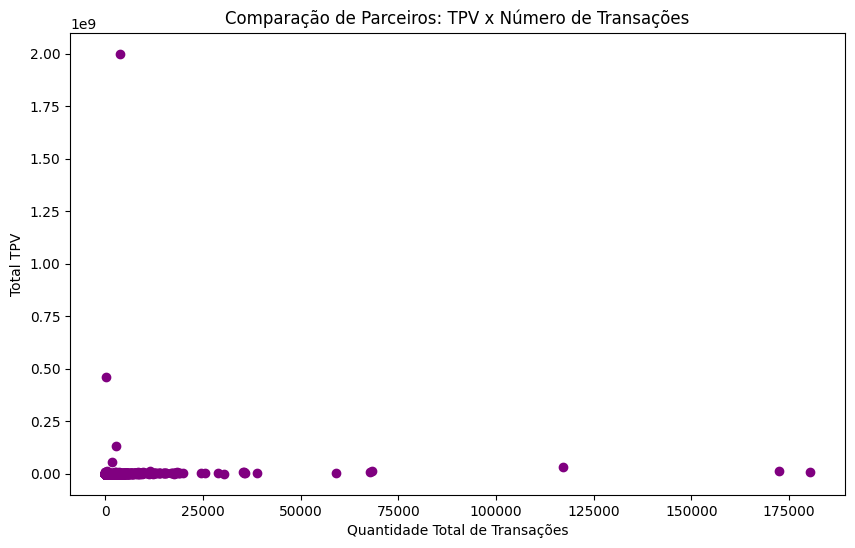

In [144]:
# Calcular o TPV total e a quantidade de transações por parceiro
parceiros_comparacao = df_metricas_pagamento.groupby('user_id').agg({
    'tpv': 'sum',
    'qtd_total': 'sum'
}).reset_index().round(1)

plt.figure(figsize=(10,6))
plt.scatter(parceiros_comparacao['qtd_total'], parceiros_comparacao['tpv'], color='purple')
plt.xlabel('Quantidade Total de Transações')
plt.ylabel('Total TPV')
plt.title('Comparação de Parceiros: TPV x Número de Transações')
plt.show()


In [152]:
parceiros_comparacao.head(10)

,user_id,tpv,qtd_total
0,1,52204.1,429
1,2,54815.2,351
2,3,7260.5,48
3,4,100940.3,379
4,5,203247.8,802
5,6,530255.1,2090
6,7,224269.9,327
7,8,20649.5,78
8,9,59593.9,368
9,10,6305.7,15


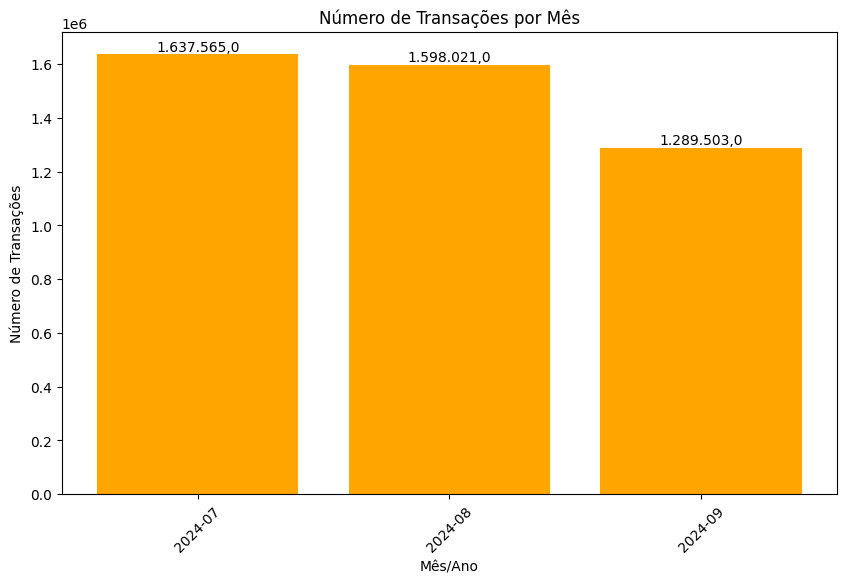

In [146]:
# Agrupar por mês e contar o número de transações
transacoes_por_mes = df_metricas_pagamento.groupby('mes_ano')['qtd_total'].sum().reset_index()

# Gráfico de barras para o número de transações por mês
plt.figure(figsize=(10,6))
bars = plt.bar(transacoes_por_mes['mes_ano'], transacoes_por_mes['qtd_total'], color='orange')
plt.xlabel('Mês/Ano')
plt.ylabel('Número de Transações')
plt.title('Número de Transações por Mês')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    formatted_val = f'{yval:,.1f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
    plt.text(bar.get_x() + bar.get_width()/2, yval, formatted_val, ha='center', va='bottom')

plt.show()



In [153]:
transacoes_por_mes

,mes_ano,qtd_total
0,2024-07,1637565
1,2024-08,1598021
2,2024-09,1289503


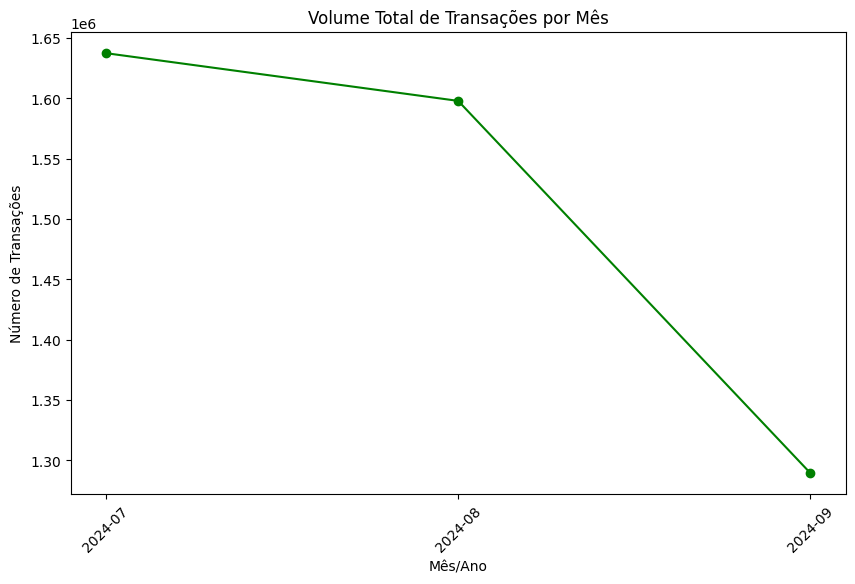

In [147]:
# Plotar gráfico de linhas para o volume total de transações por mês
plt.figure(figsize=(10,6))
plt.plot(transacoes_por_mes['mes_ano'], transacoes_por_mes['qtd_total'], marker='o', linestyle='-', color='green')
plt.xlabel('Mês/Ano')
plt.ylabel('Número de Transações')
plt.title('Volume Total de Transações por Mês')
plt.xticks(rotation=45)
plt.show()


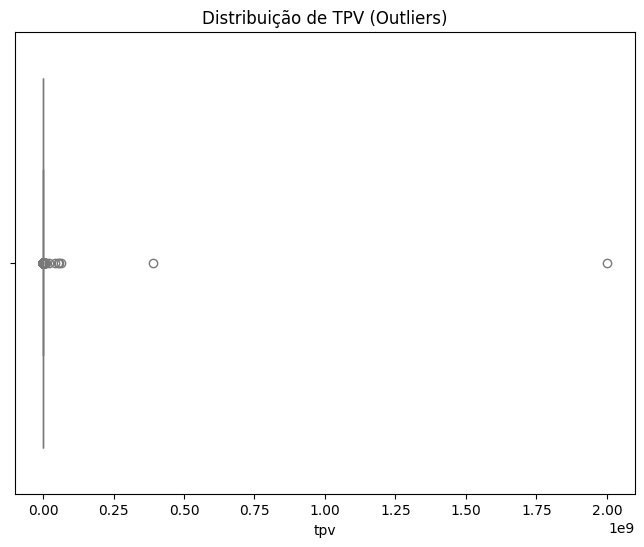

In [148]:
# Usar boxplot para visualizar outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=df_metricas_pagamento['tpv'], color='lightblue')
plt.title('Distribuição de TPV (Outliers)')
plt.show()


In [149]:
# Contar quantos meses cada usuário fez transações
fidelizacao_usuarios = df_metricas_pagamento.groupby('user_id')['mes_ano'].nunique().reset_index()
fidelizacao_usuarios.columns = ['user_id', 'meses_com_transacoes']

# Ver quantos usuários fizeram transações em mais de 1 mês
usuarios_fieis = fidelizacao_usuarios[fidelizacao_usuarios['meses_com_transacoes'] > 1].shape[0]

print(f"Quantidade de usuários que fizeram transações em mais de 1 mês: {usuarios_fieis}")


Quantidade de usuários que fizeram transações em mais de 1 mês: 8753


In [150]:
# Converter 'mes_ano' para datetime para calcular diferença de tempo
df_metricas_pagamento['mes_ano'] = pd.to_datetime(df_metricas_pagamento['mes_ano'], format='%Y-%m')

# Calcular a diferença de tempo entre as transações para cada usuário
df_metricas_pagamentos = df_metricas_pagamento.sort_values(by=['user_id', 'mes_ano'])
df_metricas_pagamentos['tempo_entre_transacoes'] = df_metricas_pagamentos.groupby('user_id')['mes_ano'].diff().dt.days

tempo_medio = df_metricas_pagamentos.groupby('user_id')['tempo_entre_transacoes'].mean().reset_index()
tempo_medio.columns = ['user_id', 'tempo_medio_entre_transacoes']

print(tempo_medio.head())


   user_id  tempo_medio_entre_transacoes
0        1                      7.750000
1        2                      4.428571
2        3                      5.166667
3        4                      4.428571
4        5                      4.428571
